In [1]:
import numpy.typing as npt
import numpy as np
from typing import Union
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import yfinance
from scipy.stats import gaussian_kde
# own module
from simulations.fractional_brownian import (
    generate_brownian_path,
    generate_n_assets_portfolio,
)
from backtest.backtester import Backtester
from strategy.strategy import SalopekStrategy
from utility.utils import (
    generate_t,
    a_order_power_mean,
    transaction_cost_L,
    compute_empirical_hurst_exponent,
)
import os

# Impact de $H$

In [35]:
H_1 = []
H_2= []
PHI_MEAN = []
PHI_MIN = []
PHI_MAX = []
LOSS_PROBA = []
V_T_psi_minus_V_T_phi_all = []
RUNNING_MIN = []
for f in tqdm(os.listdir('../results/salopek/impact_hurst_exponent/'),leave=False):
    df = pd.read_csv("../results/salopek/impact_hurst_exponent/"+f,sep=",")
    h1, h2 = tuple(map(float,f.split('.')[0].split("_")[-2:]))
    H_1.append(h1/10)
    H_2.append(h2/10)
    PHI_MEAN.append(df.V_T_phi_all.mean())
    PHI_MIN.append(df.V_T_phi_all.min())
    PHI_MAX.append(df.V_T_phi_all.max())
    LOSS_PROBA.append((df.V_T_phi_all<0).mean())
    V_T_psi_minus_V_T_phi_all.append(df.V_T_psi_minus_V_T_phi_all.mean())
    RUNNING_MIN.append(df.running_min_all.mean())
        

In [70]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Mesh3d(x=H_1, y=H_2, z=LOSS_PROBA, opacity=0.50)])


fig.update_layout(
    title='Probabilité de perte', 
    autosize=False,
    width=700, 
    height=500,
    margin=dict(l=20, r=20, b=20, t=80),
    scene=dict(
        xaxis_title='H1',
        yaxis_title='H2',
        zaxis_title='Probabilité de perte',
    ),
)

fig.show()

In [75]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Mesh3d(x=H_1,
                                y=H_2,
                                z=RUNNING_MIN, 
                                opacity=0.50,
                                # i, j and k give the vertices of triangles
                                )])


fig.update_layout(
    title='Moyenne des valorisations minimales', 
    autosize=False,
    width=700, 
    height=500,
    margin=dict(l=20, r=20, b=20, t=80),
    scene=dict(
        xaxis_title='H1',
        yaxis_title='H2',
        zaxis_title='Valeur de portefeuille',
    ),
)

fig.show()

In [71]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Mesh3d(x=H_1,
                                y=H_2,
                                z=V_T_psi_minus_V_T_phi_all, 
                                opacity=0.50,
                                
                                # i, j and k give the vertices of triangles
                                )])


fig.update_layout(
    title='Difference discret vs continu', 
    autosize=False,
    width=700, 
    height=500,
    margin=dict(l=20, r=20, b=20, t=80),
    scene=dict(
        xaxis_title='H1',
        yaxis_title='H2',
        zaxis_title='Différence de valeur terminale',
    ),
)

fig.show()

In [73]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Mesh3d(x=H_1, y=H_2, z=PHI_MEAN, opacity=0.50),
                      go.Mesh3d(x=H_1, y=H_2, z=PHI_MAX, opacity=0.50),
                      go.Mesh3d(x=H_1, y=H_2, z=PHI_MIN, opacity=0.50)])


fig.update_layout(
    title='Maximum, moyenne, minimum de la valeur terminale du portefeuille', 
    autosize=False,
    width=700, 
    height=500,
    margin=dict(l=20, r=20, b=20, t=80),
    scene=dict(
        xaxis_title='H1',
        yaxis_title='H2',
        zaxis_title='Valeur terminale',
    ),
)

fig.show()

# Impact de $\alpha$ et $\beta$

# Autre

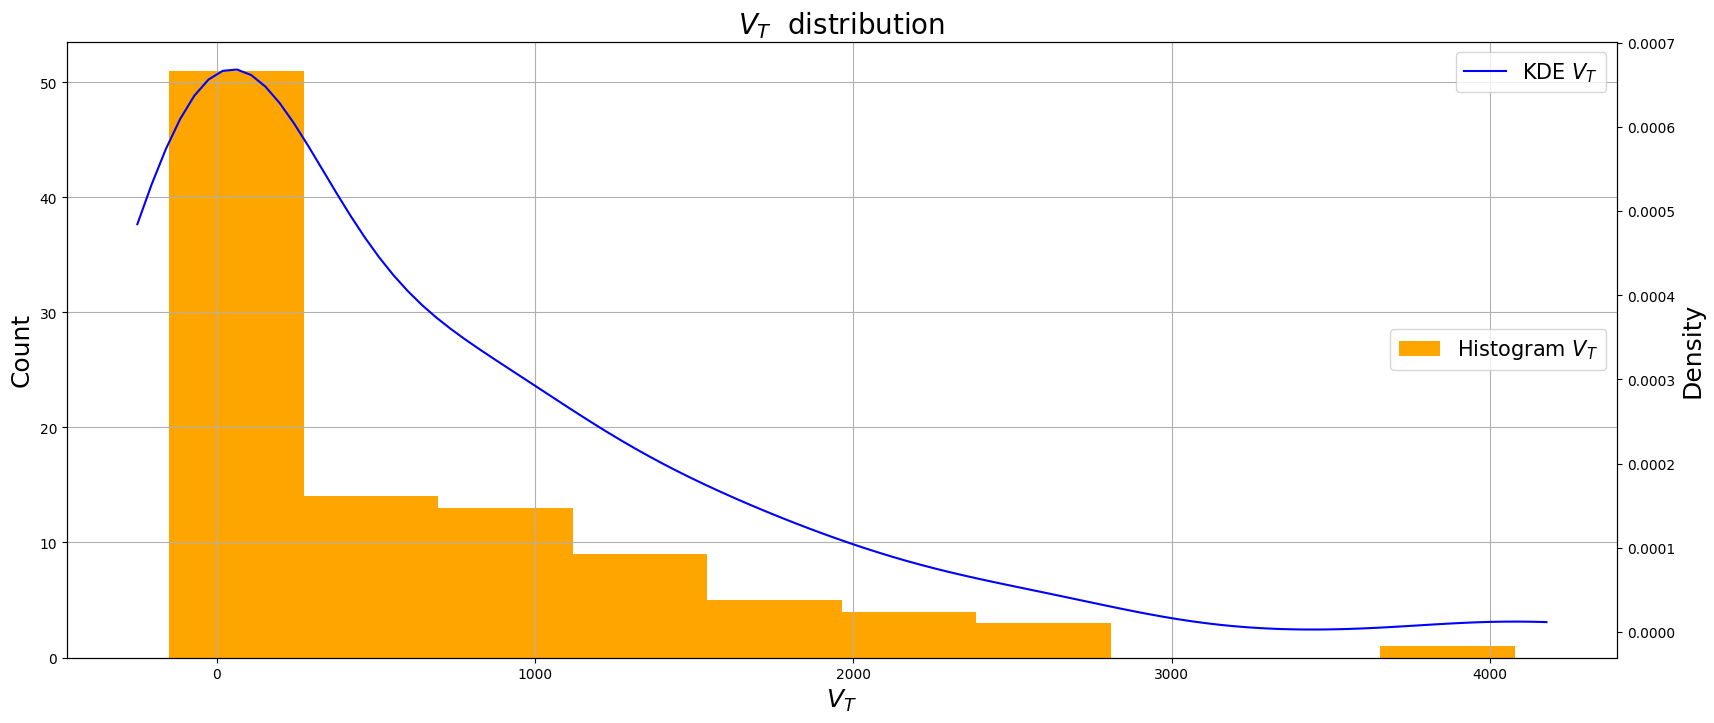

In [49]:
_, ax = plt.subplots(1, 1, figsize=(20, 8))

ax.hist(
    V_T_phi,
    color="orange",
    # alpha=0.3,
    label="Histogram $V_T$",
)
ax_l = ax.twinx()
ax_l.plot(
    np.linspace(min(V_T_phi)-100,max(V_T_phi)+100,100),
    gaussian_kde(V_T_phi, bw_method="scott").pdf( np.linspace(min(V_T_phi)-100,max(V_T_phi)+100,100)),
    color="blue",
    # alpha=0.3,
    label="KDE $V_T$",
)

ax.set_xlabel("$V_T$ ", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
ax_l.set_ylabel("Density", fontsize=18)
ax.set_title(
    "$V_T$  distribution",
    fontsize=20,
)
ax.grid()
ax.legend(fontsize=15, loc="center right")
ax_l.legend(fontsize=15, loc="upper right")